<center>

# **Health Care Prediction**

</center>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numerize import numerize
import plotly.express as px
import seaborn as sns
import os
import sys

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('D:\Datascience\Dataset\Health Prediction')

In [4]:
hcare = pd.read_csv('healthcare_dataset.csv')

## **Exploratory Data Analysis**

In [5]:
hcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [6]:
hcare.shape

(10000, 15)

In [7]:
#Remove all unwanted white space from dataset
hcare = hcare.replace(r'\s+', ' ', regex=True)

In [8]:
#Change the name of columns 
hcare.columns = hcare.columns.str.replace(" ","_")

In [9]:
hcare.columns

Index(['Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider',
       'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results'],
      dtype='object')

In [10]:
hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood_Type          10000 non-null  object 
 4   Medical_Condition   10000 non-null  object 
 5   Date_of_Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance_Provider  10000 non-null  object 
 9   Billing_Amount      10000 non-null  float64
 10  Room_Number         10000 non-null  int64  
 11  Admission_Type      10000 non-null  object 
 12  Discharge_Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test_Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [11]:
hcare.describe(include = 'all').style.background_gradient(cmap='cividis')

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000
unique,9378,nan,2,8,6,1815,9416,8639,5,nan,nan,3,1834,5,3
top,Michael Johnson,nan,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,nan,nan,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,nan,5075,1275,1708,15,7,19,2040,nan,nan,3391,14,2079,3456
mean,nan,51.452200,nan,nan,nan,nan,nan,nan,nan,25516.806778,300.082000,nan,nan,nan,nan
std,nan,19.588974,nan,nan,nan,nan,nan,nan,nan,14067.292709,115.806027,nan,nan,nan,nan
min,nan,18.000000,nan,nan,nan,nan,nan,nan,nan,1000.180837,101.000000,nan,nan,nan,nan
25%,nan,35.000000,nan,nan,nan,nan,nan,nan,nan,13506.523967,199.000000,nan,nan,nan,nan
50%,nan,52.000000,nan,nan,nan,nan,nan,nan,nan,25258.112566,299.000000,nan,nan,nan,nan
75%,nan,68.000000,nan,nan,nan,nan,nan,nan,nan,37733.913727,400.000000,nan,nan,nan,nan


In [12]:
hcare.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing_Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room_Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


In [13]:
hcare.describe(include='object').T

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood_Type,10000,8,AB-,1275
Medical_Condition,10000,6,Asthma,1708
Date_of_Admission,10000,1815,2019-04-12,15
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance_Provider,10000,5,Cigna,2040
Admission_Type,10000,3,Urgent,3391
Discharge_Date,10000,1834,2021-11-28,14


In [14]:
hcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
dtype: int64

In [15]:
(hcare==0).sum()

Name                  0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
dtype: int64

In [16]:
hcare.columns

Index(['Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider',
       'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results'],
      dtype='object')

In [17]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(hcare.isnull().sum() * 100 / len(hcare),2))

Checking Data has null values or not
Name                  0.0
Age                   0.0
Gender                0.0
Blood_Type            0.0
Medical_Condition     0.0
Date_of_Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance_Provider    0.0
Billing_Amount        0.0
Room_Number           0.0
Admission_Type        0.0
Discharge_Date        0.0
Medication            0.0
Test_Results          0.0
dtype: float64


In [18]:
#shallow copy
df = hcare.copy()
df1 = hcare.copy()

In [19]:
# Dividing Dataset into Numerical and Categorical columns
#Separiting Numerical and categorical columns
num = []
cat = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        cat.append(col)

print('Numerical Columns :\n',num)
print('\nCategorical columns :\n',cat)

Numerical Columns :
 ['Age', 'Billing_Amount', 'Room_Number']

Categorical columns :
 ['Name', 'Gender', 'Blood_Type', 'Medical_Condition', 'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider', 'Admission_Type', 'Discharge_Date', 'Medication', 'Test_Results']


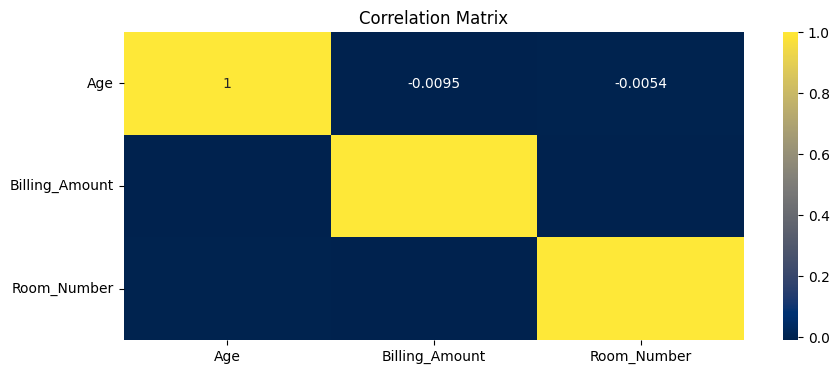

In [20]:
#calculate the Correlation Matrix
num_col = hcare.select_dtypes(include=['int64','float64']).corr()
#visualizing the correlation matrix using Heatmap
plt.figure(figsize=(10,4))
sns.heatmap(num_col,annot=True,cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

- correlation Matrix doesn't show much information for the plotted data
- It some what show the features are negatively correlated

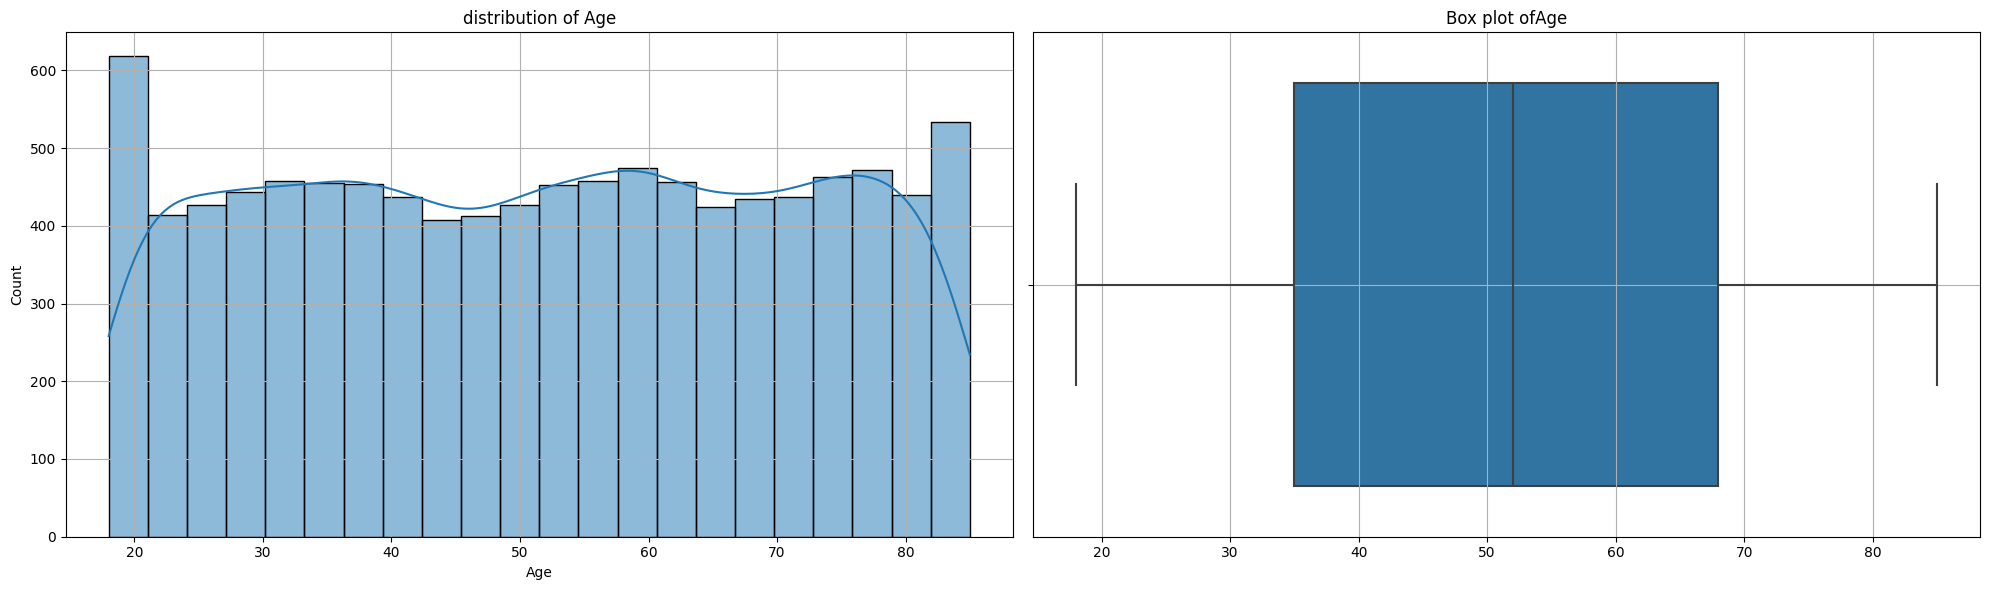

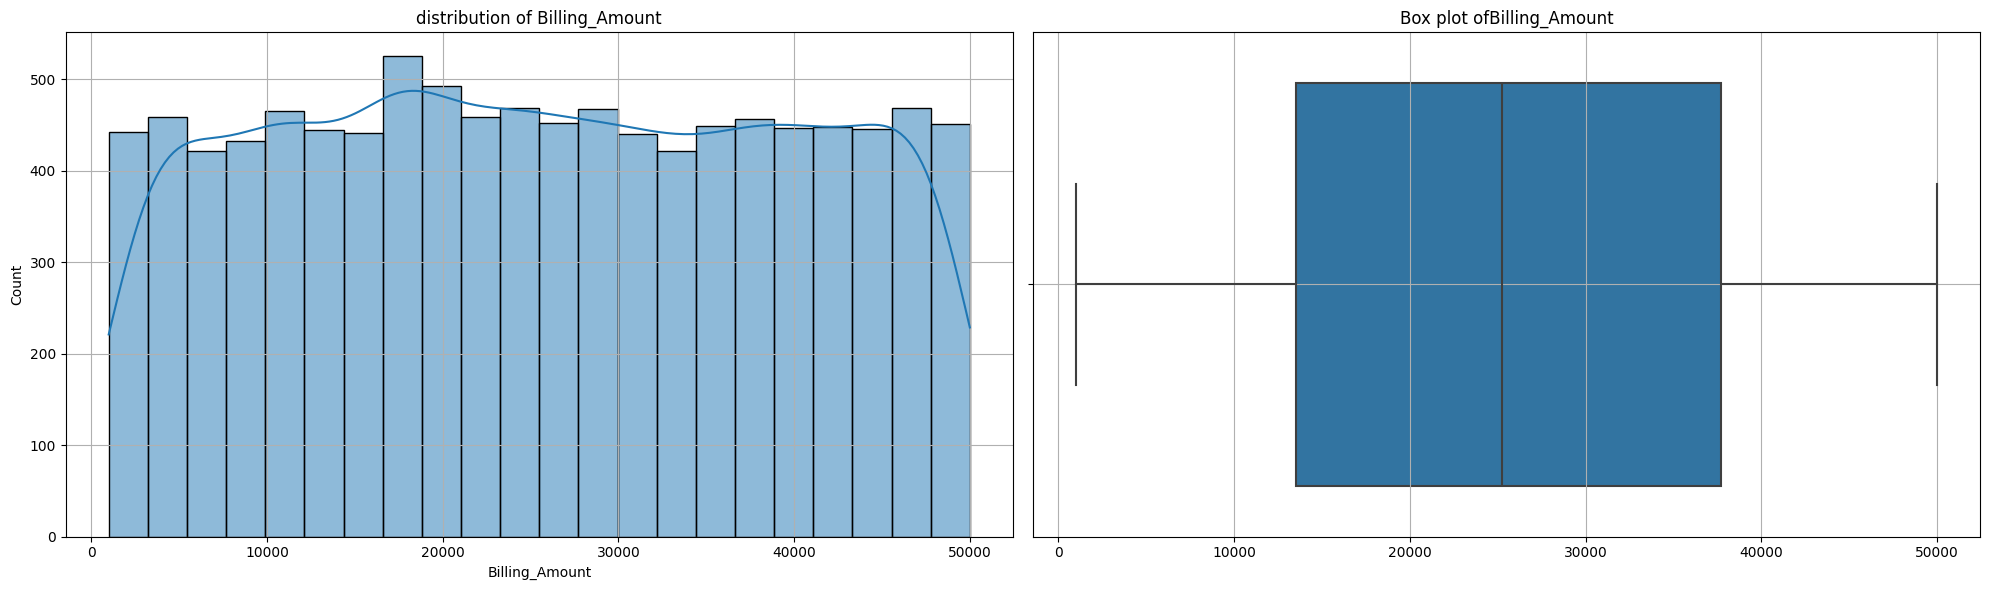

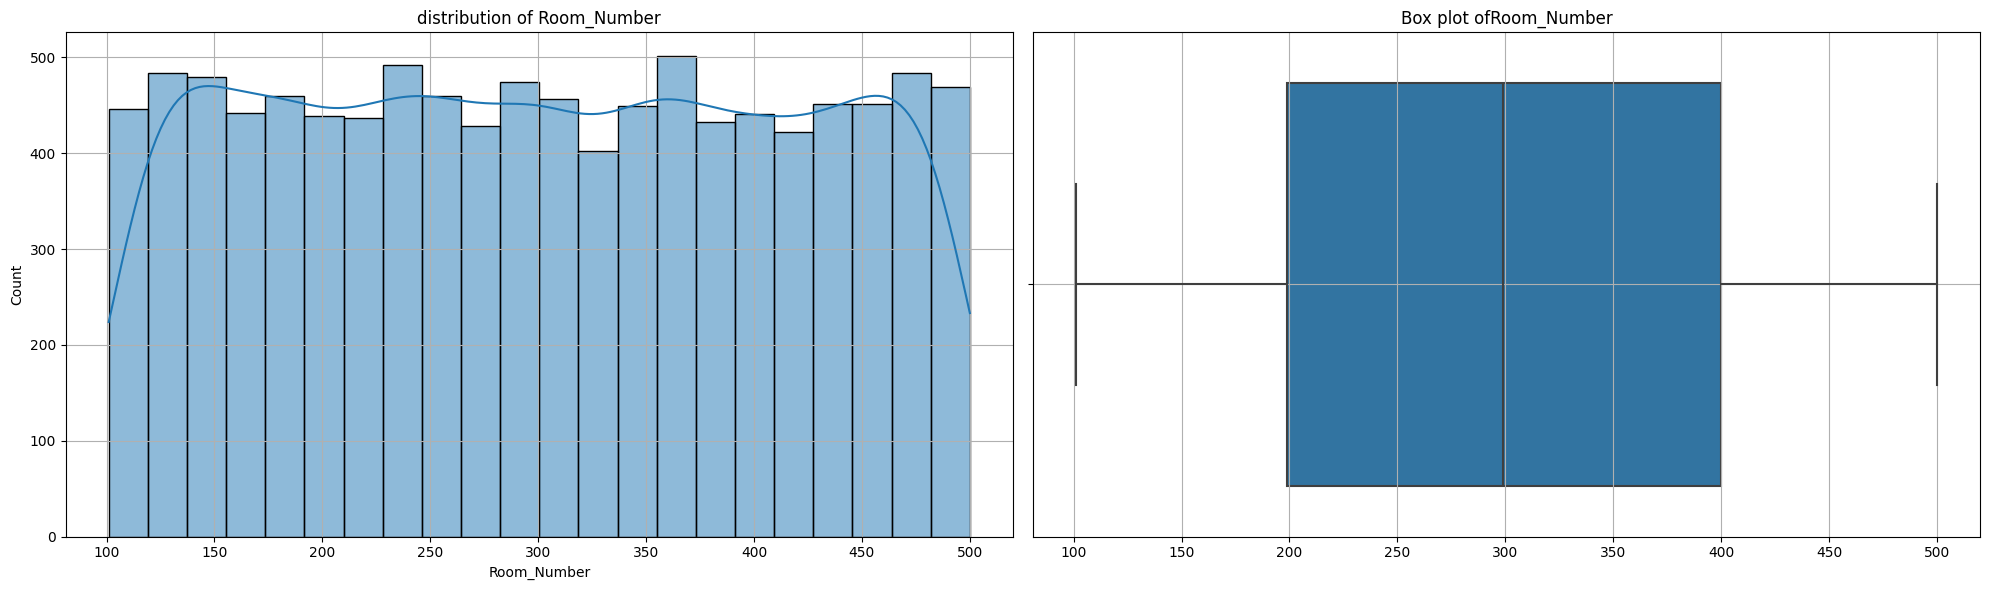

In [21]:
# Analysing the NUmerical columns
# Checking for Outliers
for i in num:
    fig,axes = plt.subplots(1,2,figsize = (20,6))
    
    sns.histplot(df[i],kde = True, ax=axes[0])
    axes[0].set_title(f'distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')
    
    sns.boxplot(x= df[i],ax = axes[1])
    axes[1].set_title(f'Box plot of{i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()


- There's no outliers in the Dataset and the data is Normally Distributed

## **Univariate Analysis**

**Age**

In [22]:
# Checking the unique values of Age
age = hcare['Age'].unique()
print('='*10)
print('AGE :')
print('='*10)
print(sorted(age))

AGE :
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]


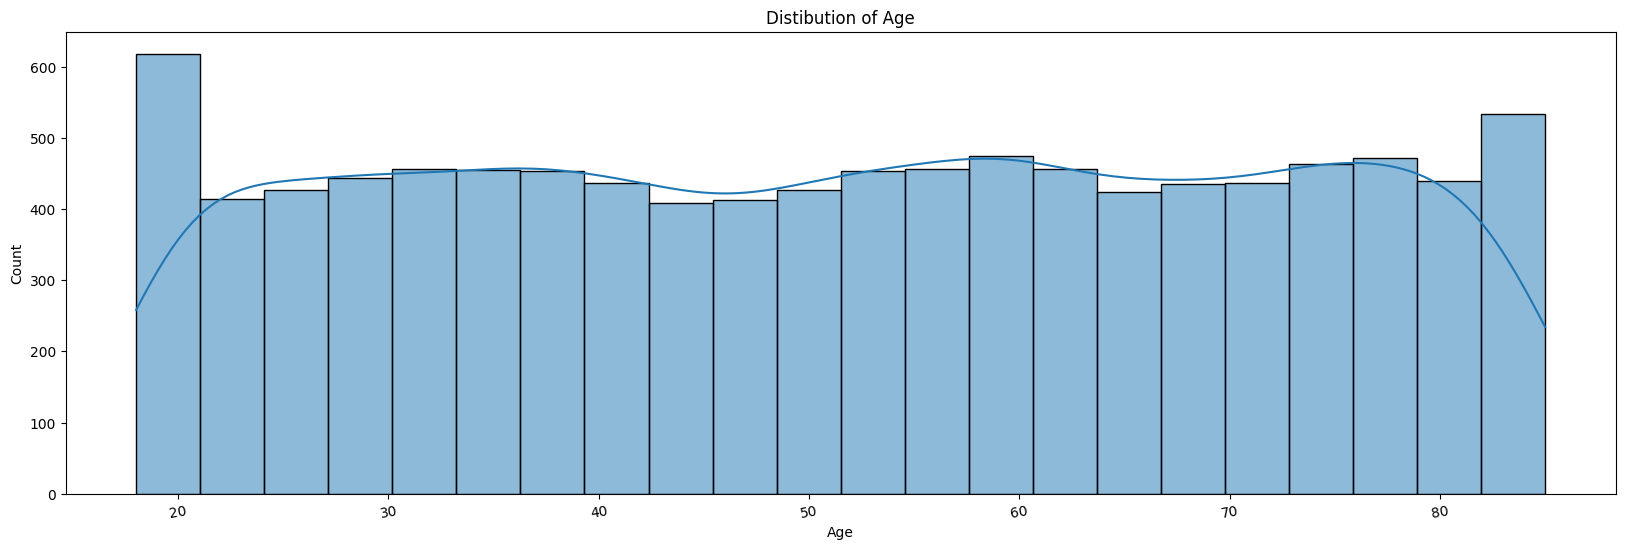

In [23]:
plt.figure(figsize=(20,6))
sns.histplot(data=hcare['Age'],kde=True)
plt.title('Distibution of Age')
plt.xticks(rotation=10)
plt.show()

- The Age is mostly Distributed around 20 and also at 80
- This shows younger age people's are more aware & concern with health-care rather then people's who's age lies in range of 21 - 65

**Gender**

In [24]:
hcare['Gender'].unique()

array(['Female', 'Male'], dtype=object)

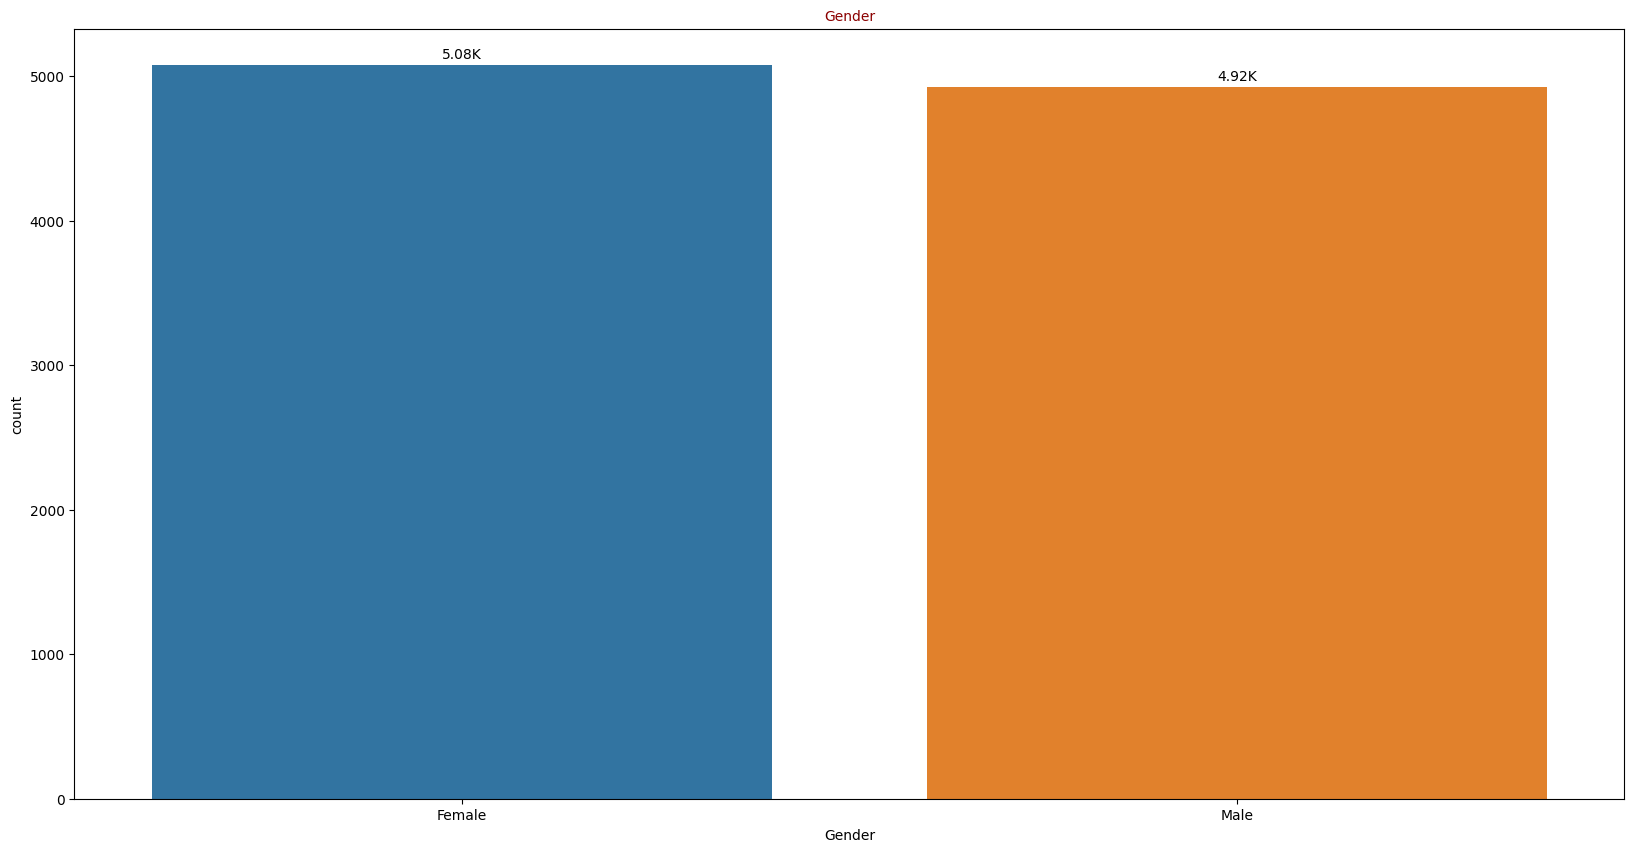

In [25]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare, x =  'Gender', ax = ax, order = hcare['Gender'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy =(rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = "center",
               va = "bottom",
               color = "Black")
ax.set_title("Gender", fontsize = 10, fontweight = 'bold', color = 'darkred')
fig.show()

 - This graph shows there are females involved in 'Health Care' as this can be why women's live longer than men's. (the count is halfly near and difficult to comapare)

**Blood Type**

In [26]:
b_type = hcare['Blood_Type'].unique()
print('*'*10)
print('Blood Type :')
print('*'*10)
print(sorted(b_type))

**********
Blood Type :
**********
['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


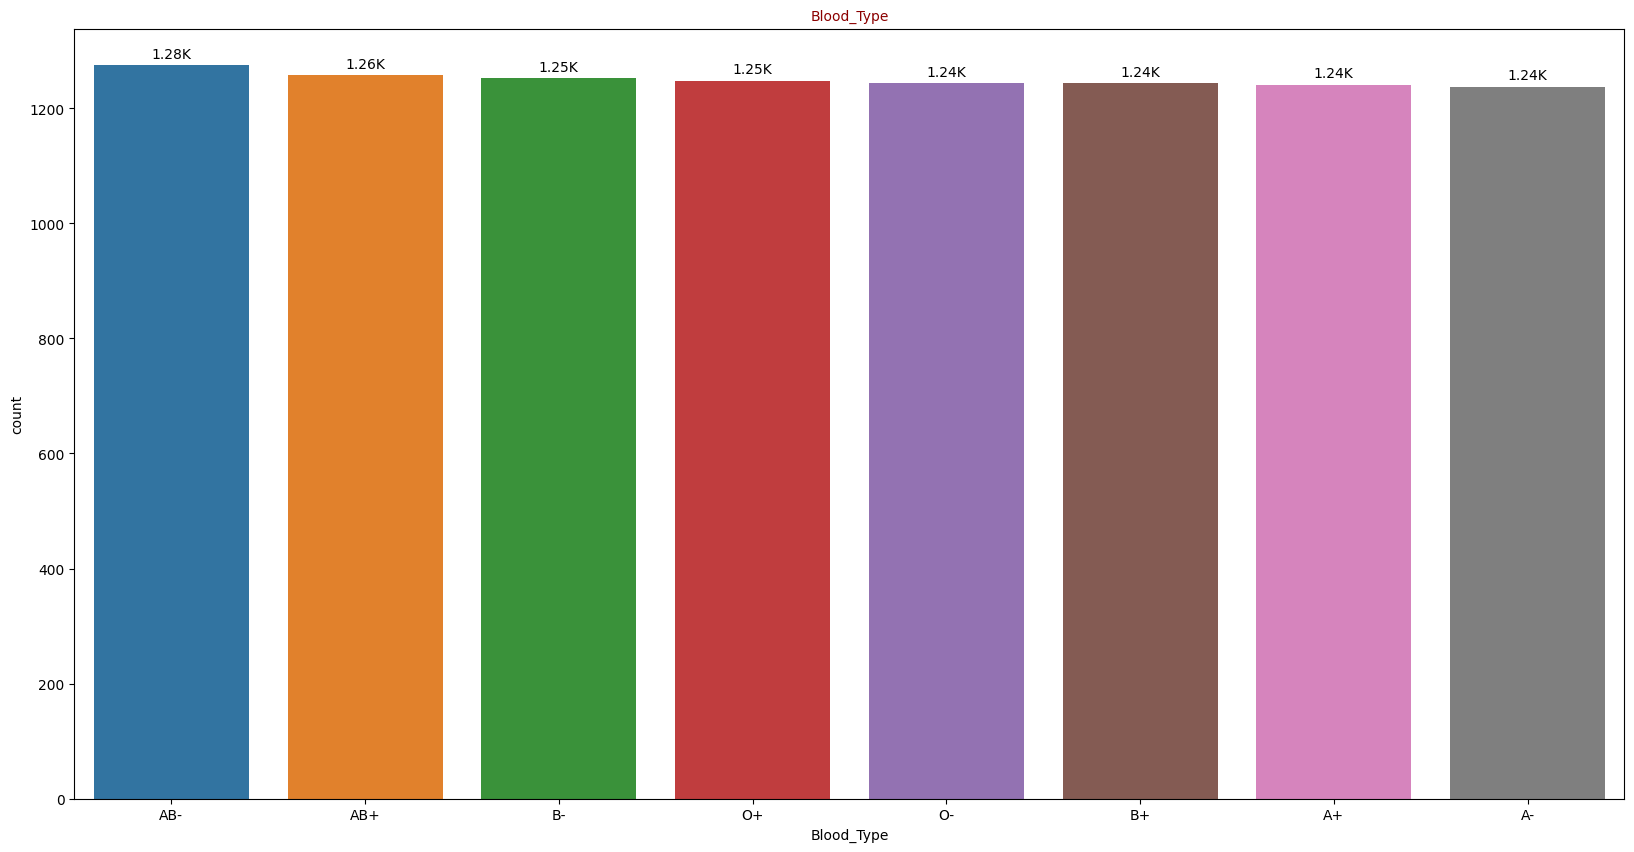

In [27]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare, x =  'Blood_Type', ax = ax, order = hcare['Blood_Type'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy =(rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = "center",
               va = "bottom",
               color = "Black")
ax.set_title("Blood_Type", fontsize = 10, fontweight = 'bold', color = 'darkred')
fig.show()

- AB is most counted blood group in the dataset followed up with AB+, B-, O+- 
Type AB-negative blood is considered a universal plasma donor, meaning anyone can receive type AB-negative plasma

**Medical Condition**

In [28]:
mc = hcare['Medical_Condition'].unique()
print('-'*20)
print('Medical Condition :')
print('-'*20)
print(mc)

--------------------
Medical Condition :
--------------------
['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']


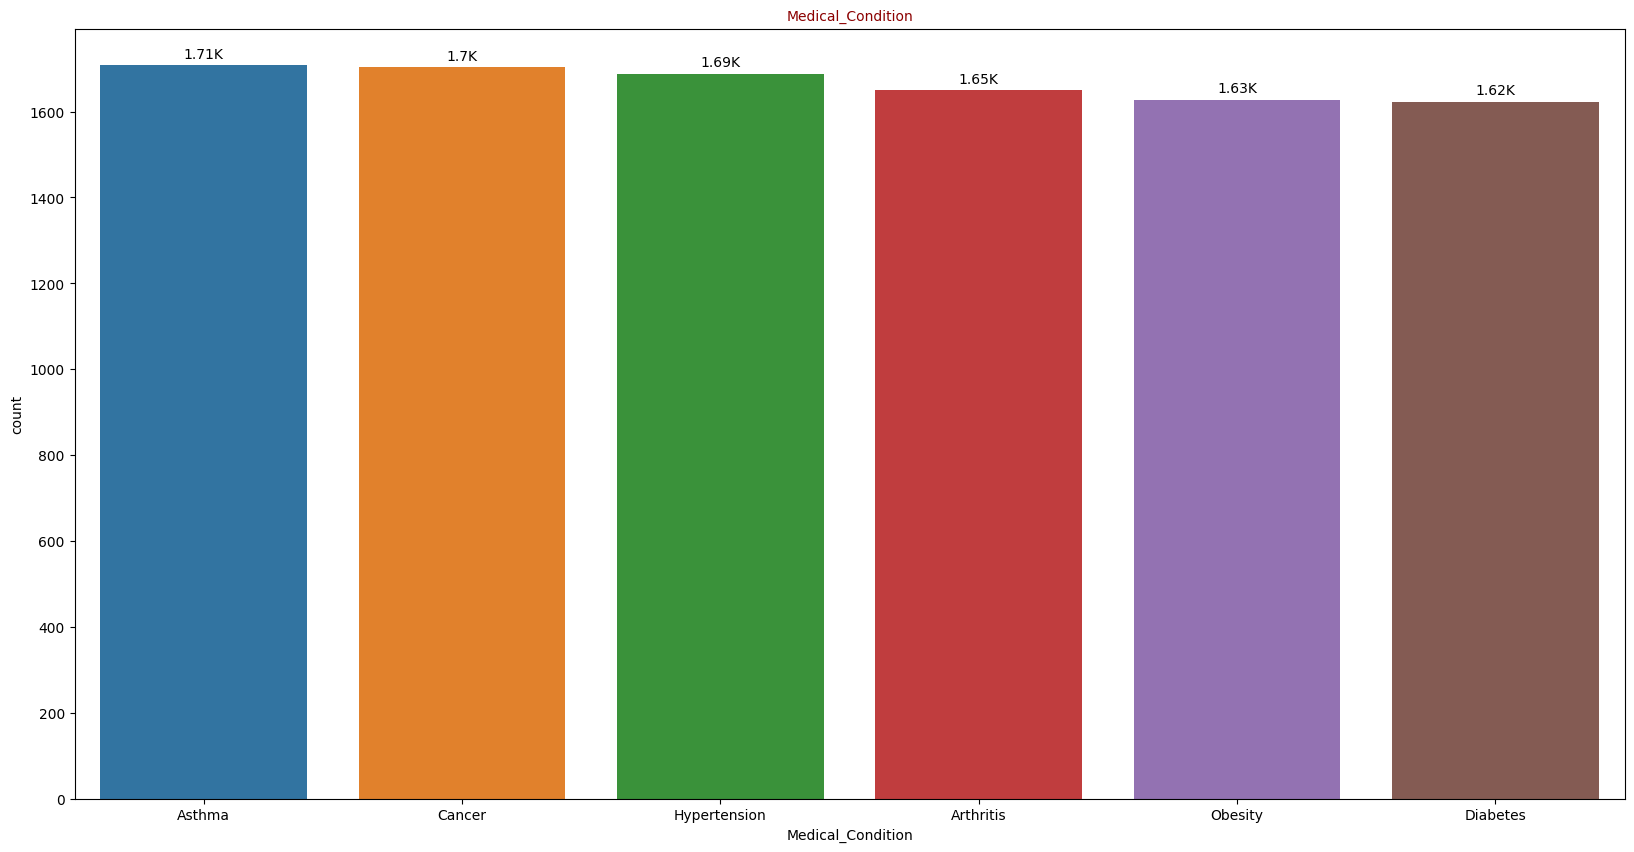

In [29]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare, x =  'Medical_Condition', ax = ax, order = hcare['Medical_Condition'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}",
               xy =(rect.get_x()+rect.get_width()/2, height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = "center",
               va = "bottom",
               color = "Black")
ax.set_title("Medical_Condition", fontsize = 10, fontweight = 'bold', color = 'darkred')
fig.show()

- Most of the Medical condition is Asthma followed by Cancer and Hypertension
- This shows most of the test are taken from most stressfull people segment and we can also sale them health benefits and sale health-insurance.

**Doctor**

In [30]:
dr = hcare['Doctor'].unique()
print('-'*10)
print('Doctor :')
print('-'*10)
print(dr)

----------
Doctor :
----------
['Patrick Parker' 'Diane Jackson' 'Paul Baker' ... 'Robert Nicholson'
 'Jamie Lewis' 'Tasha Avila']


In [31]:
len(hcare['Doctor'].unique())

9416

- This feature has 9416 unique values.

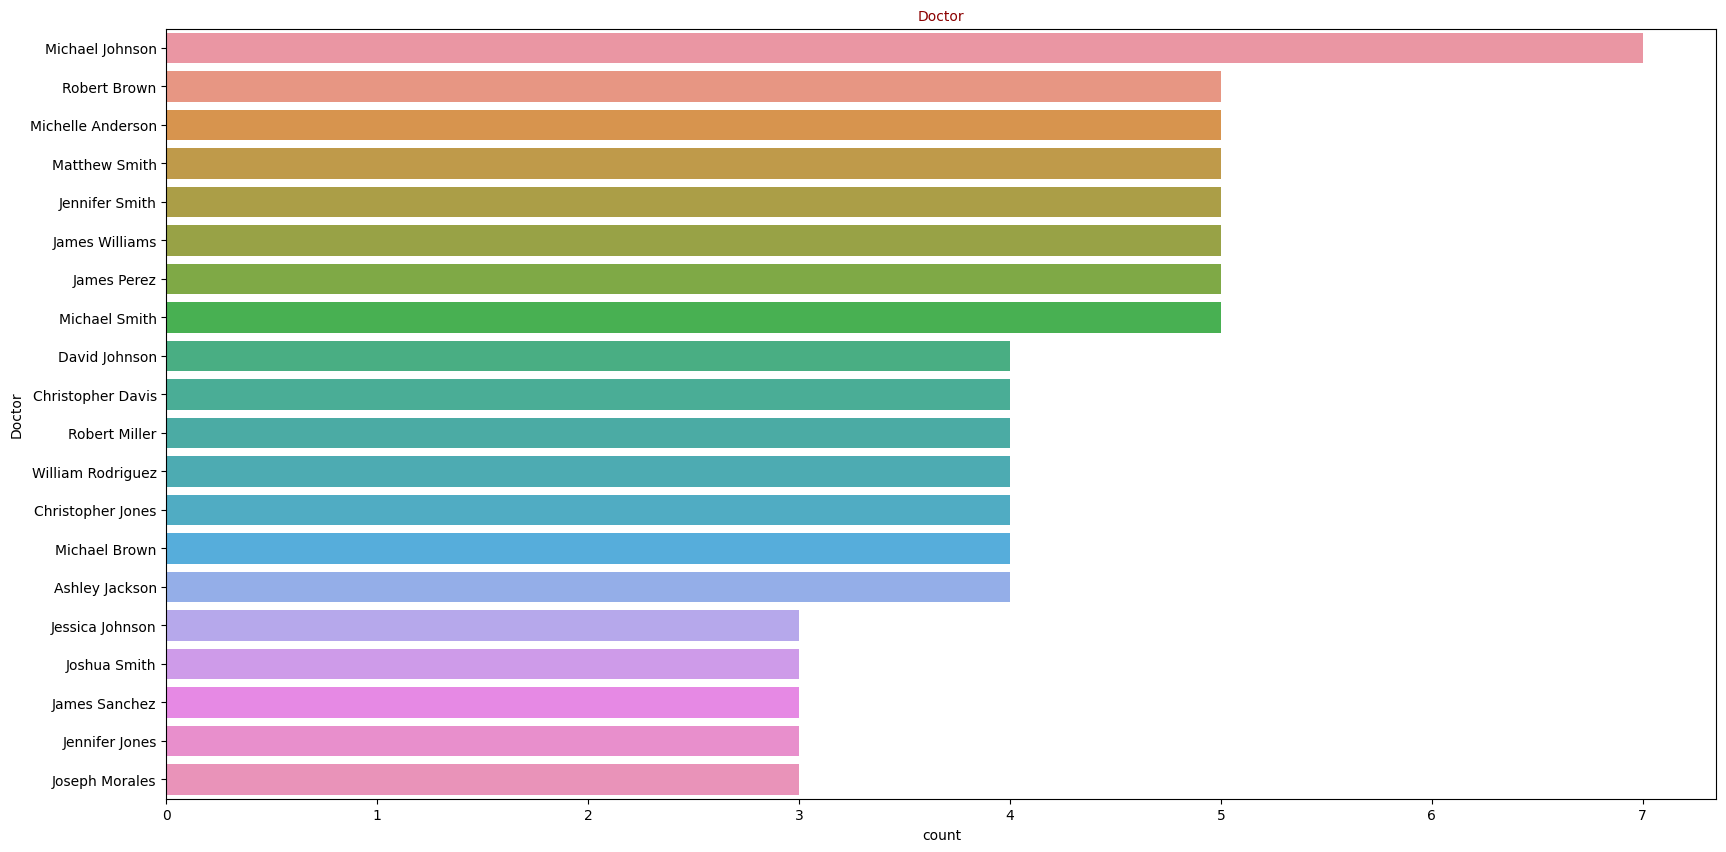

In [32]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare, y ='Doctor', ax = ax, order = hcare['Doctor'].value_counts().iloc[:20].index)
ax.set_title("Doctor", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- The most counted Doctor is Michael Johnson

**Hospital**

In [33]:
hos = hcare['Hospital'].unique()
print('-'*12)
print('Hospital :')
print('-'*12)
print(hos)
print('\nIt has',len(hos),'unique variables')

------------
Hospital :
------------
['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Nash-Krueger' 'Wilson-Lyons' 'Torres, Young and Stewart']

It has 8639 unique variables


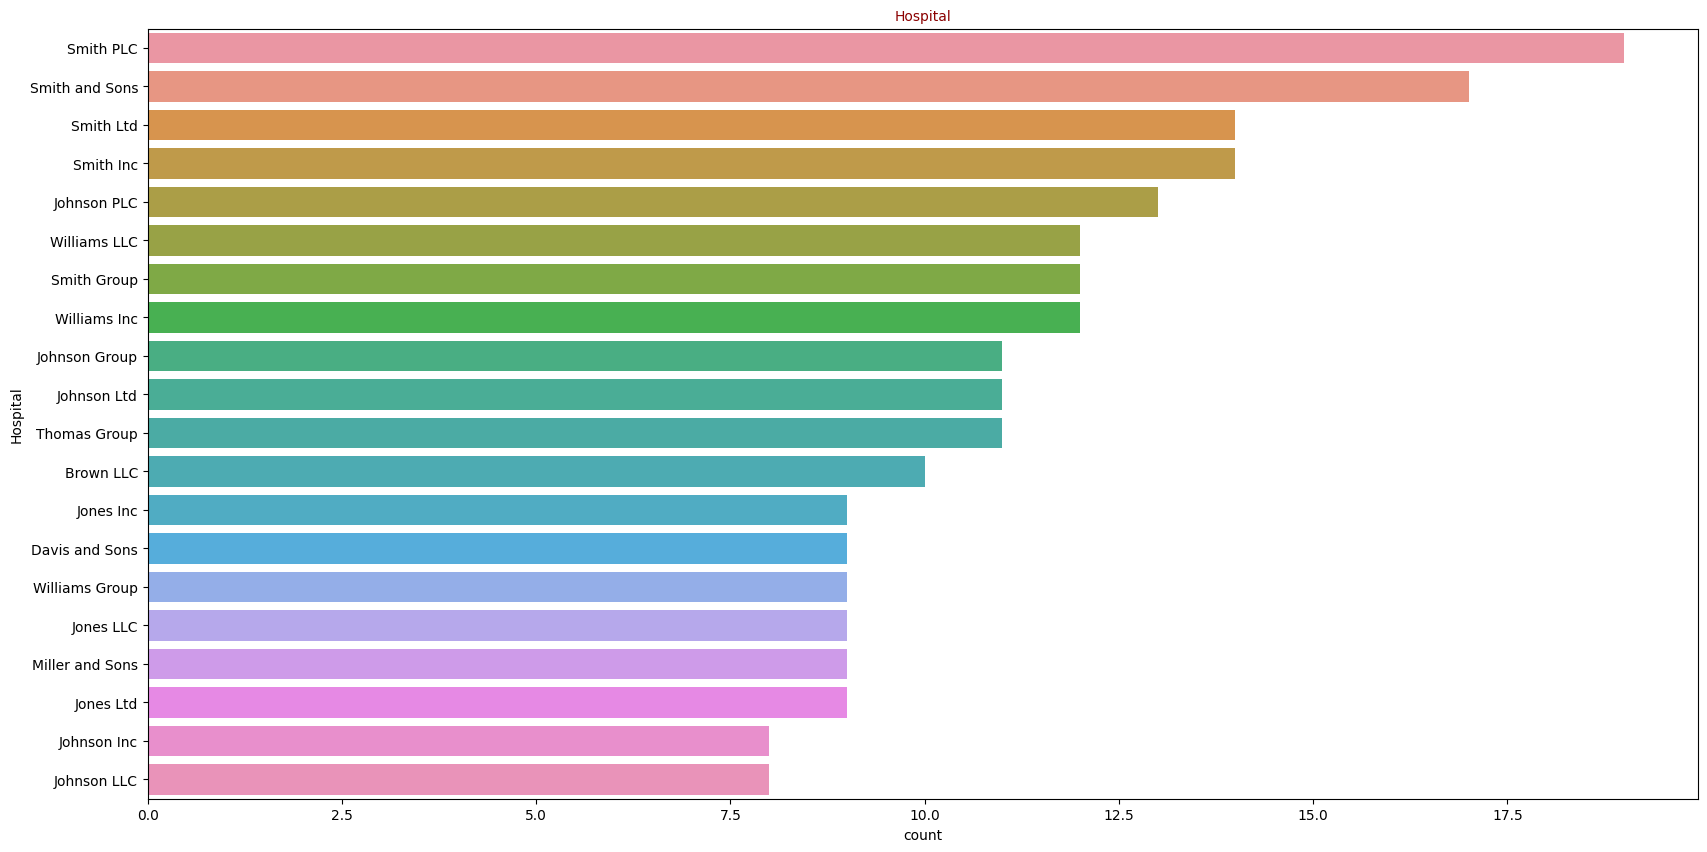

In [34]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare, y ='Hospital', ax = ax, order = hcare['Hospital'].value_counts().iloc[:20].index)
ax.set_title("Hospital", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- Most frequent Hospital in the Dataset is SMITH PLC, followed up by SMITH & SONS, SMITH Ltd, SMITH Inc.

**Insurance Providers**

In [35]:
ins = hcare['Insurance_Provider'].unique()
print('-'*20)
print('Insurance_Provider :')
print('-'*20)
print(ins)
print('\nIt has',len(ins),'unique variables')

--------------------
Insurance_Provider :
--------------------
['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']

It has 5 unique variables


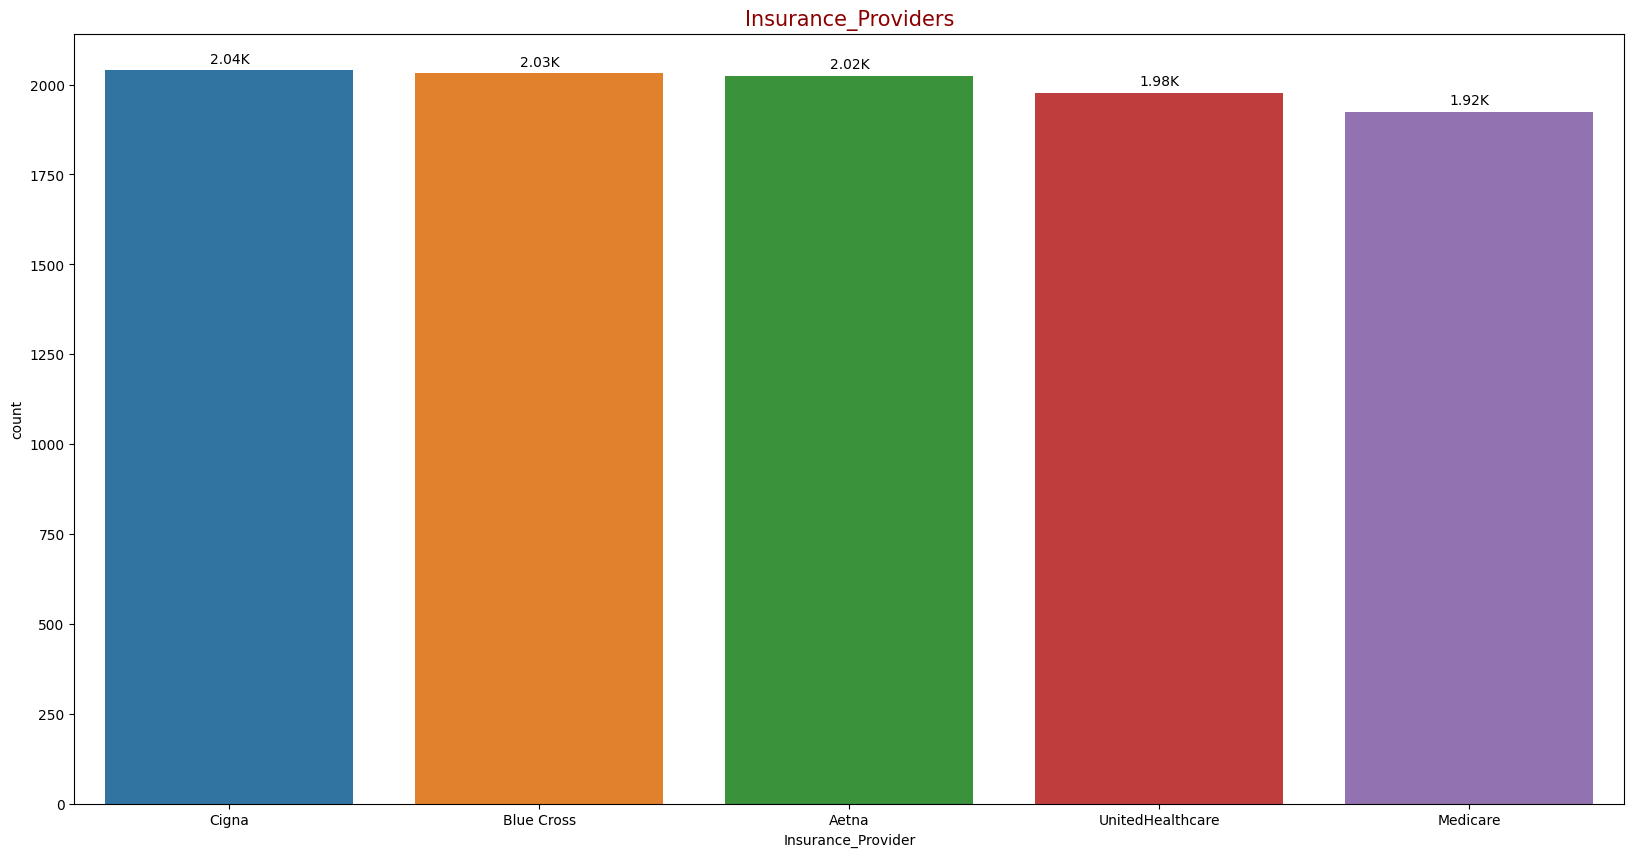

In [36]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare,x = 'Insurance_Provider',ax = ax,order=hcare['Insurance_Provider'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2,height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom',
               color = 'black')
ax.set_title('Insurance_Providers', fontsize = 15, fontweight = 'bold', color = 'darkred')
fig.show()

- Cigna is the most buyed insurance

**Admission Type**

In [37]:
adm = hcare['Admission_Type'].unique()
print('-'*20)
print('Admission Type :')
print('-'*20)
print(adm)
print('\n It has',len(adm),'unique values')

--------------------
Admission Type :
--------------------
['Elective' 'Emergency' 'Urgent']

 It has 3 unique values


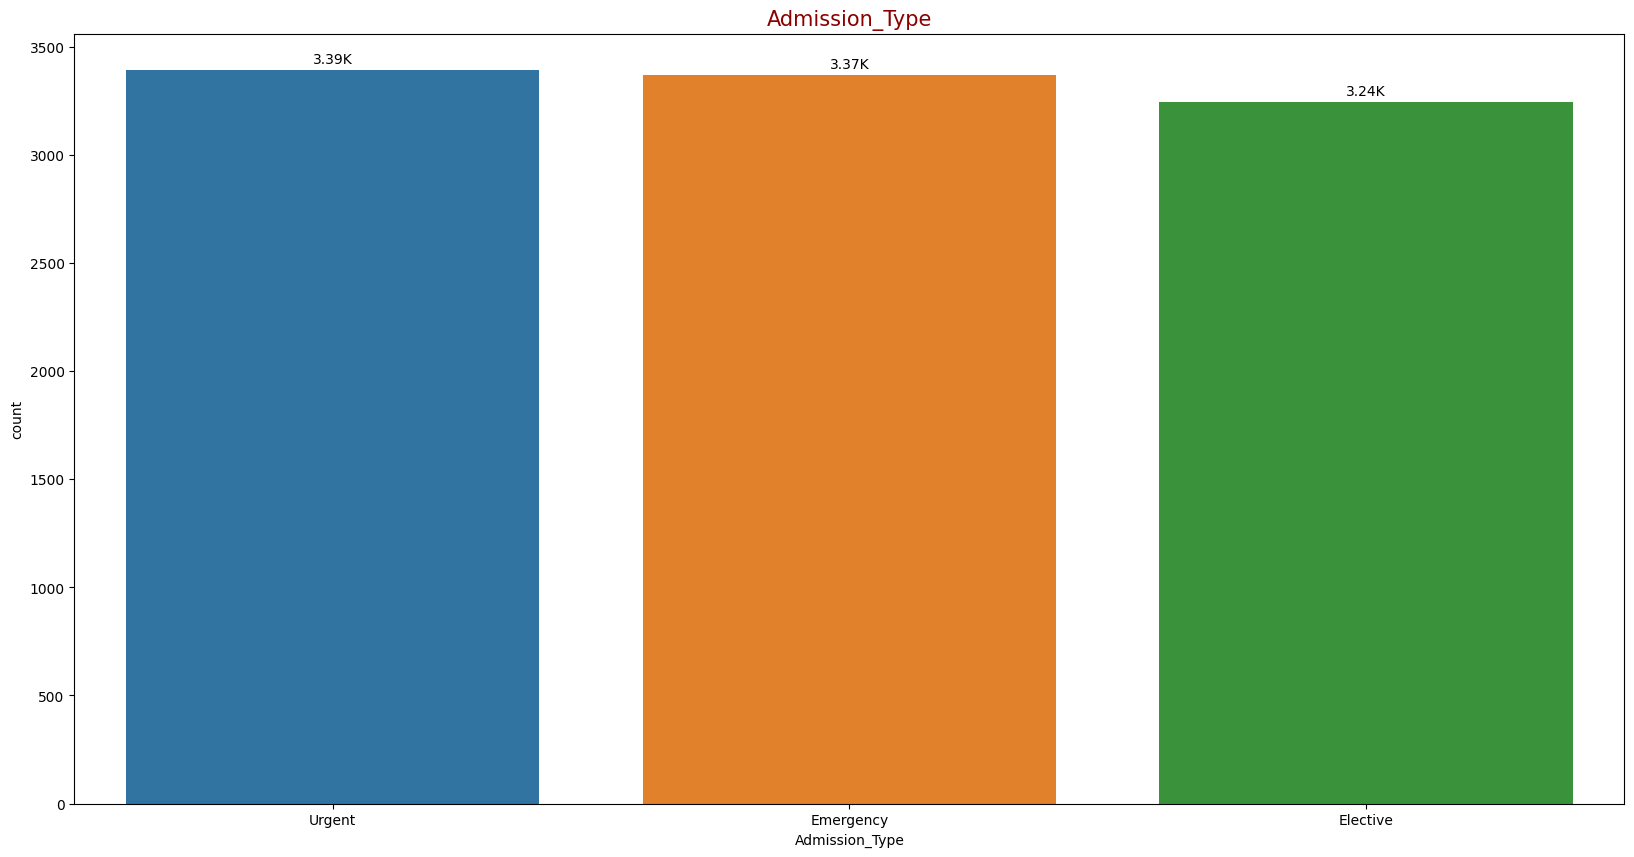

In [38]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare,x = 'Admission_Type',ax = ax,order=hcare['Admission_Type'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2,height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom',
               color = 'black')
ax.set_title('Admission_Type', fontsize = 15, fontweight = 'bold', color = 'darkred')
fig.show()

- Most of the Admission cases are marked as Urgent

**Medication**

In [39]:
med = hcare['Medication'].unique()
print('-'*20)
print('Medication :')
print('-'*20)
print(med)
print('\n It has',len(med),'unique values')

--------------------
Medication :
--------------------
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']

 It has 5 unique values


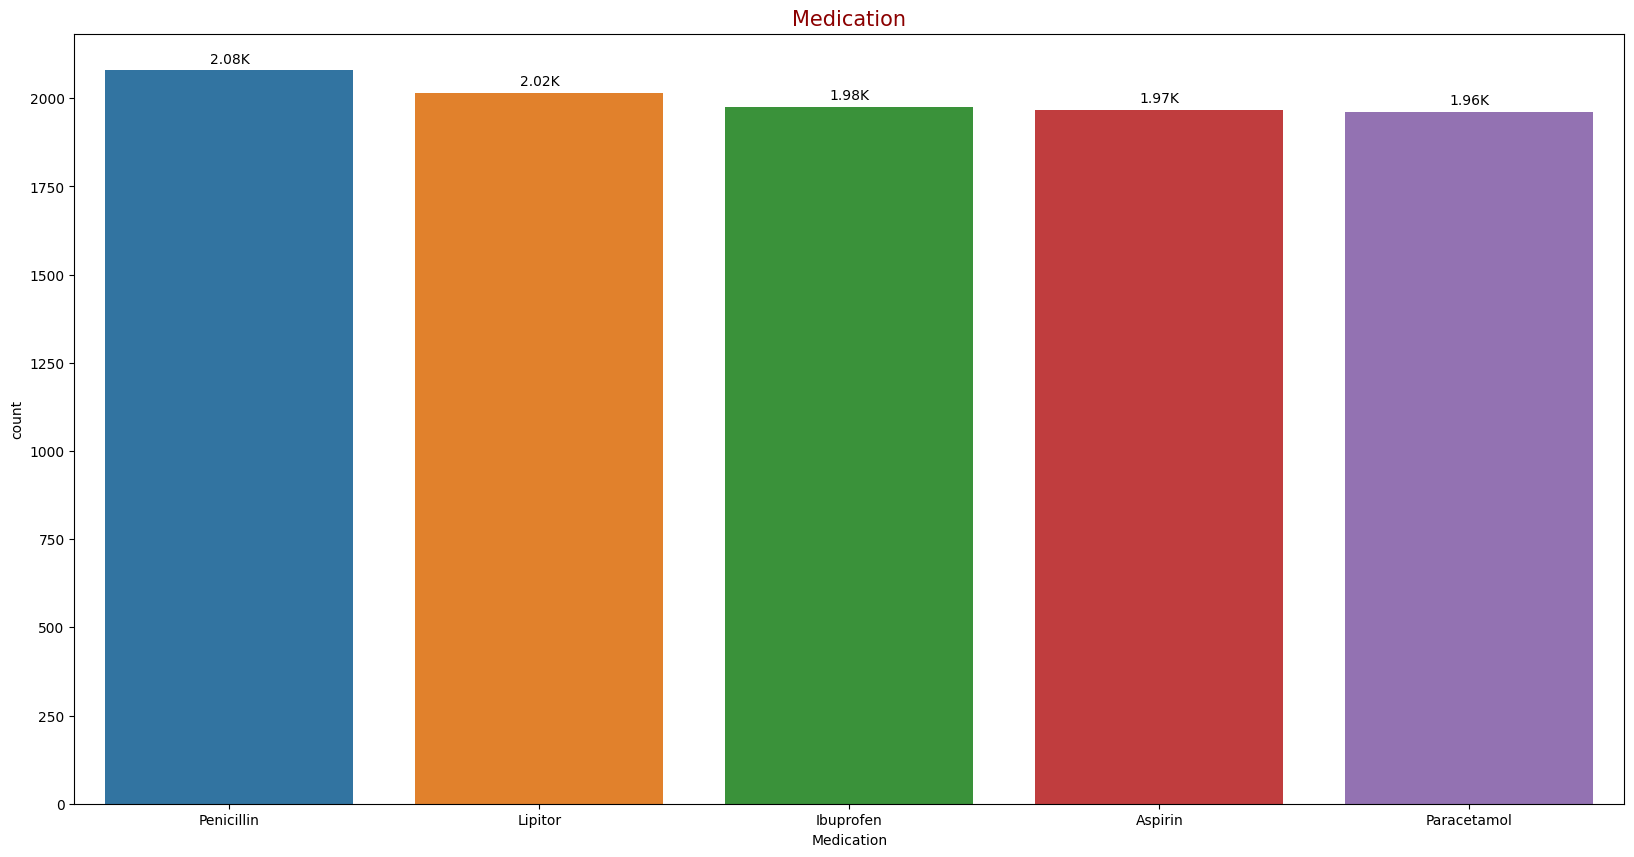

In [40]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare,x = 'Medication',ax = ax,order=hcare['Medication'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2,height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom',
               color = 'black')
ax.set_title('Medication', fontsize = 15, fontweight = 'bold', color = 'darkred')
fig.show()

- Most used Medication is Penicillin
- Penicillin is commonly used to treat respiratory tract infections, skin infections, urinary tract infections, and other bacterial infections.


**Test Results**

In [41]:
test_res = hcare['Test_Results'].unique()
print('-'*20)
print('Test results :')
print('-'*20)
print(test_res)
print('\n It has',len(test_res),'unique values')

--------------------
Test results :
--------------------
['Inconclusive' 'Normal' 'Abnormal']

 It has 3 unique values


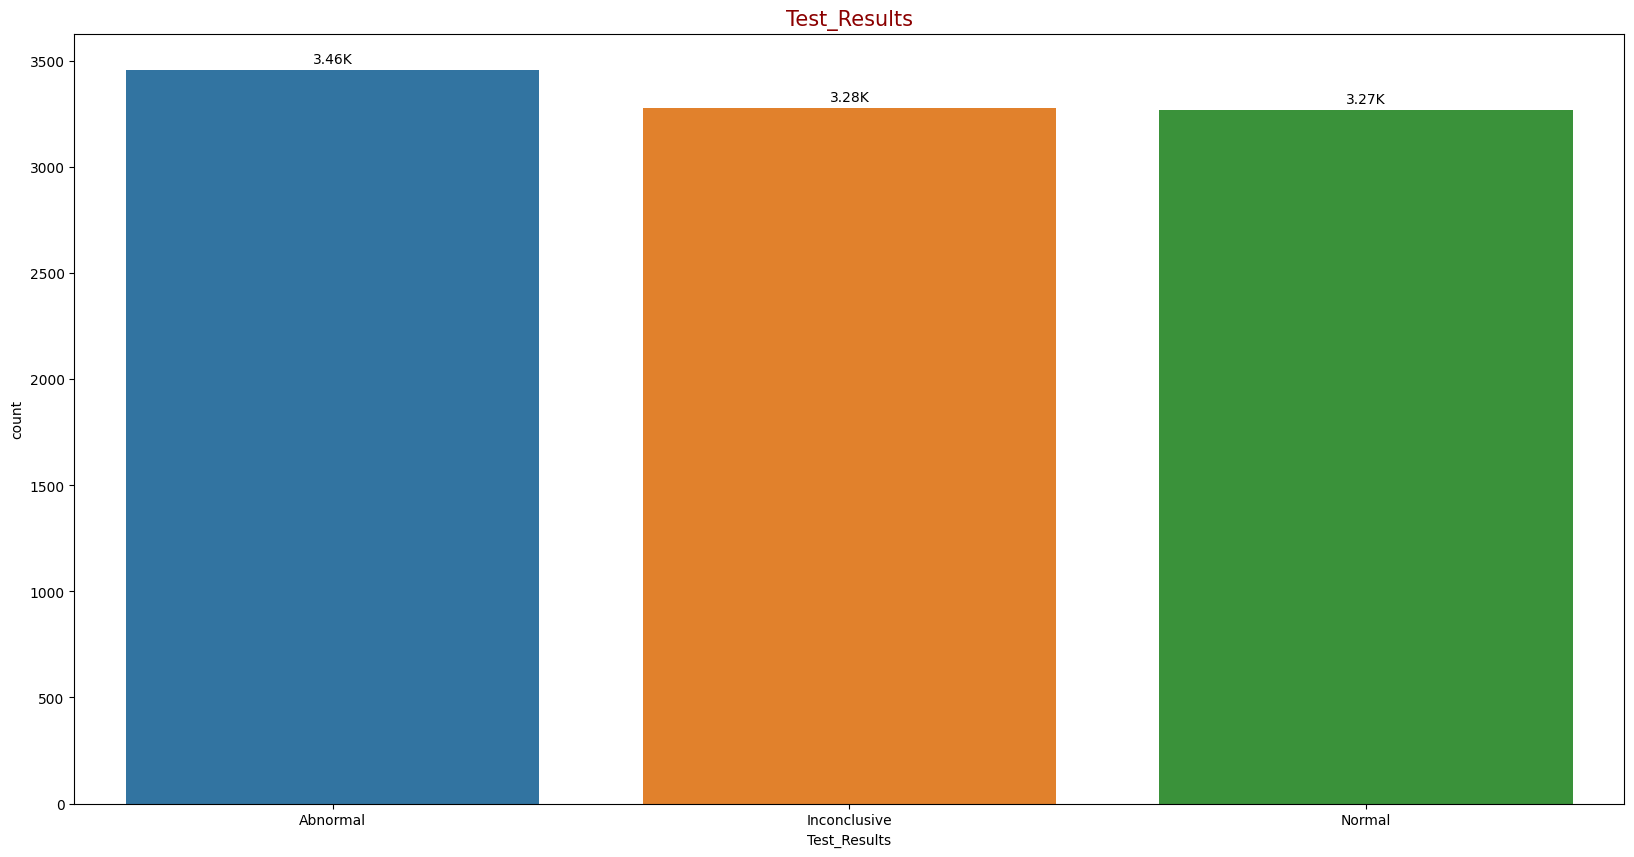

In [42]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(hcare,x = 'Test_Results',ax = ax,order=hcare['Test_Results'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f"{numerize.numerize(height)}",
               xy = (rect.get_x()+rect.get_width()/2,height),
               xytext = (0,3),
               textcoords = 'offset points',
               ha = 'center',
               va = 'bottom',
               color = 'black')
ax.set_title('Test_Results', fontsize = 15, fontweight = 'bold', color = 'darkred')
fig.show()

- Most of the Test Results are Abnormal.

## **Bi-Variate Analysis**

In [43]:
hcare['Date_of_Admission'] = pd.to_datetime(hcare['Date_of_Admission'])
hcare['Discharge_Date'] = pd.to_datetime(hcare['Discharge_Date'])

In [44]:
hcare['Admission_date'] = hcare['Date_of_Admission'].dt.weekday
hcare['Admission_month'] = hcare['Date_of_Admission'].dt.month
hcare['Days_hospitalized'] = hcare['Discharge_Date'] - hcare['Date_of_Admission']
hcare['day_of_week'] = hcare['Date_of_Admission'].dt.day_of_week
hcare['Discharge_month'] = hcare['Discharge_Date'].dt.day_of_week
hcare['Date_of_discharge'] = hcare['Discharge_Date'].dt.weekday

In [45]:
hcare.head()

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,...,Admission_Type,Discharge_Date,Medication,Test_Results,Admission_date,Admission_month,Days_hospitalized,day_of_week,Discharge_month,Date_of_discharge
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,...,Elective,2022-12-01,Aspirin,Inconclusive,3,11,14 days,3,3,3
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,...,Emergency,2023-06-15,Lipitor,Normal,3,6,14 days,3,3,3
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,...,Emergency,2019-02-08,Lipitor,Normal,2,1,30 days,2,4,4
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,...,Urgent,2020-05-03,Penicillin,Abnormal,5,5,1 days,5,6,6
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,...,Urgent,2021-08-02,Paracetamol,Normal,4,7,24 days,4,0,0


**Analyzing Billing Amount according to Medical conditions and Test results**

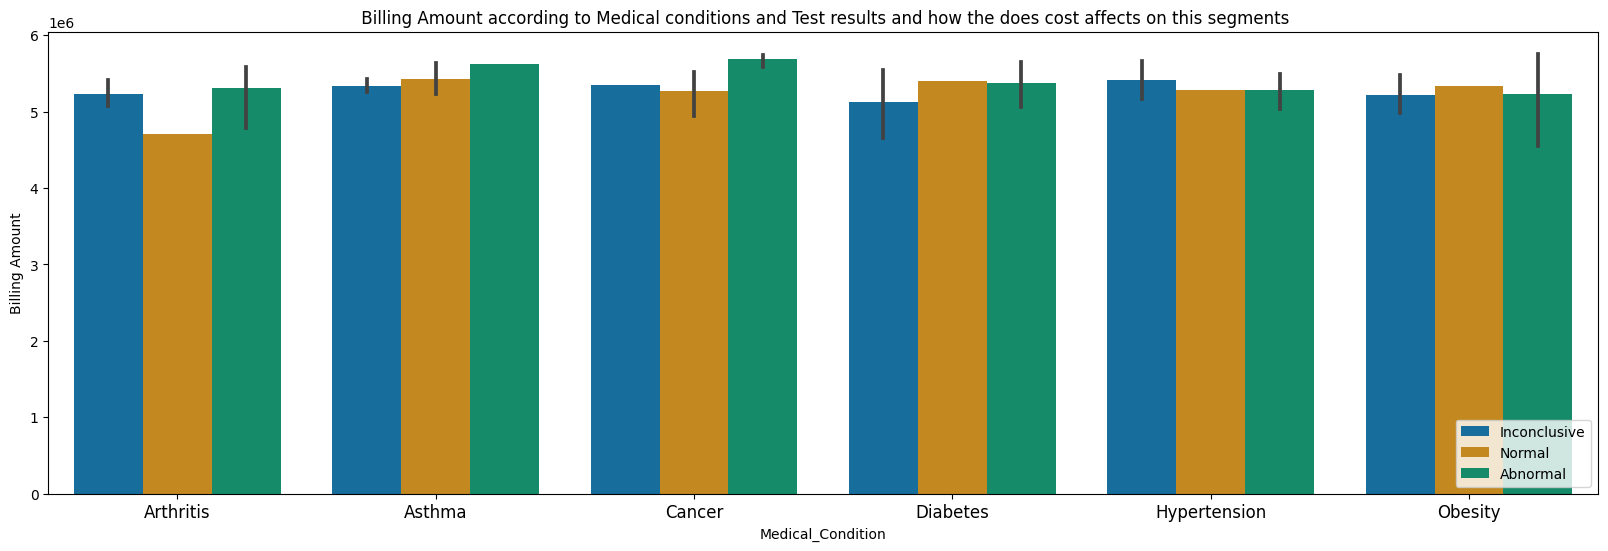

In [46]:
df = hcare.groupby(['Blood_Type', 'Medical_Condition'])[['Billing_Amount']].sum().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x = df['Medical_Condition'], y = df['Billing_Amount'], hue = hcare['Test_Results'], palette = 'colorblind')
plt.title(' Billing Amount according to Medical conditions and Test results and how the does cost affects on this segments')
plt.legend(loc = 'lower right')
plt.ylabel('Billing Amount')
plt.xticks(rotation = 0, fontsize = 12)
plt.show()

**Blood_Type - Medical_Conditions**

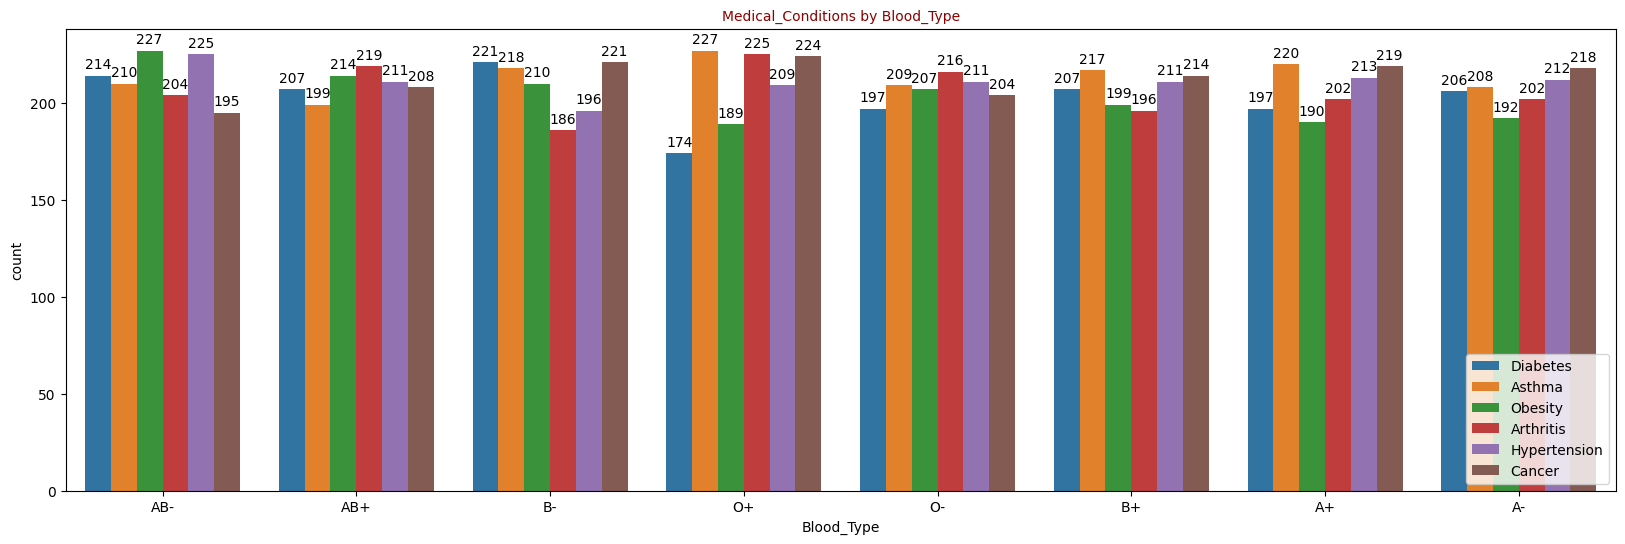

In [47]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Blood_Type", hue=hcare['Medical_Condition'],ax = ax,order=hcare['Blood_Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Conditions by Blood_Type", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In AB- we can view that most of patient are in Hypertention or obesity as both are connected if you are in obesity then most probably you can be in hypertension
- 
In AB+ most patient are target of Arthritis and Obesit
- 
In B- most of patient are target of Cancer & Diabet
-  s
In O+ most of patient are target of Asthma

**Blood Type by Gender**

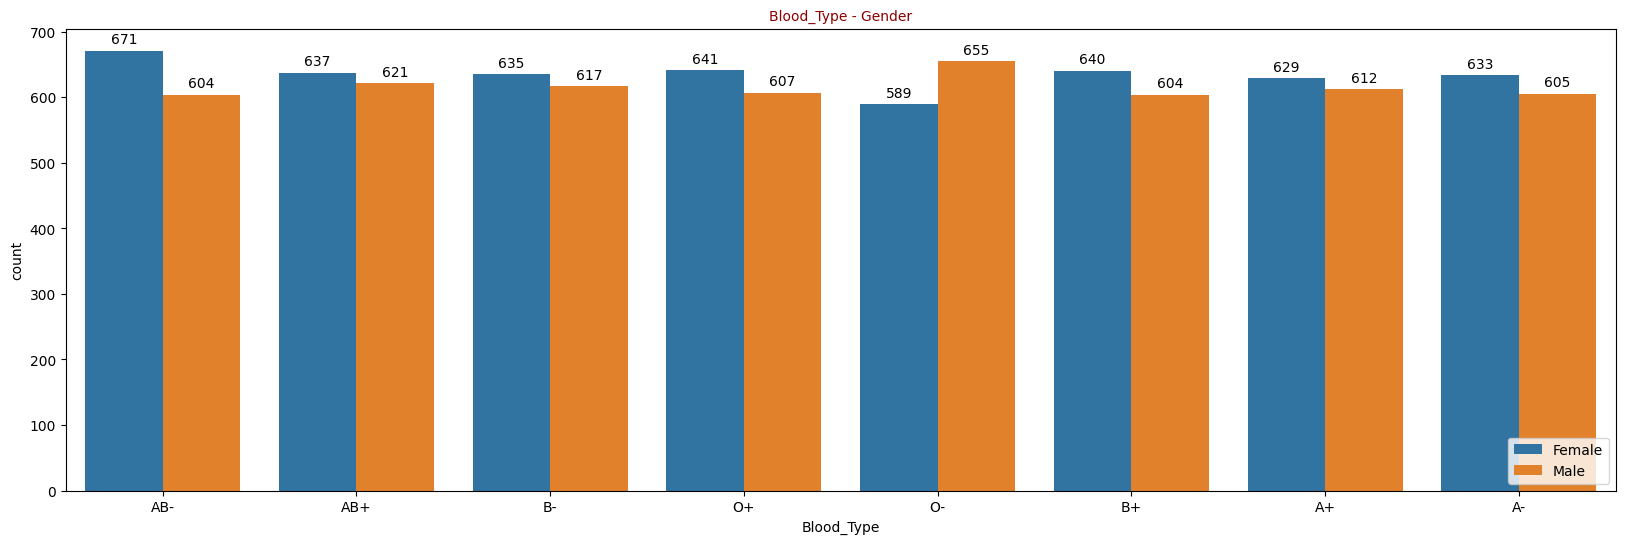

In [48]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Blood_Type", hue=hcare['Gender'],ax = ax,order=hcare['Blood_Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Blood_Type - Gender", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

**Blood Type - Medication**

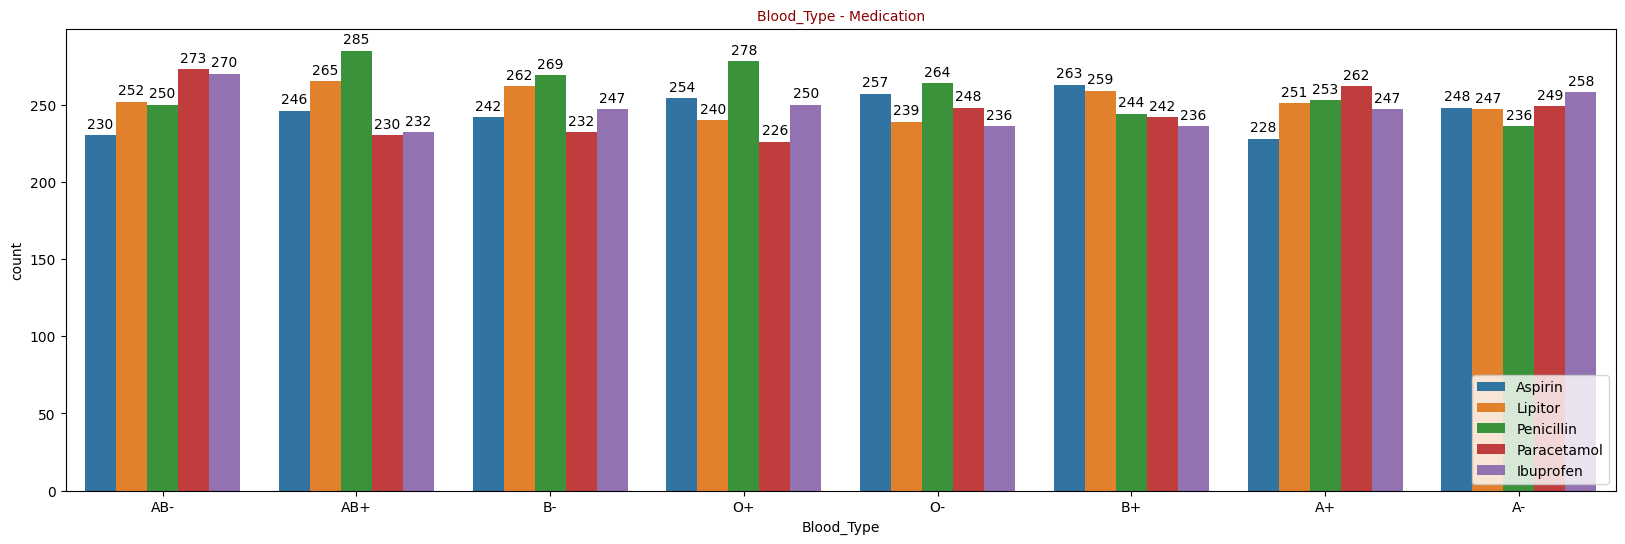

In [49]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Blood_Type", hue=hcare['Medication'],ax = ax,order=hcare['Blood_Type'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Blood_Type - Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

**Medical_Condition - Gender**

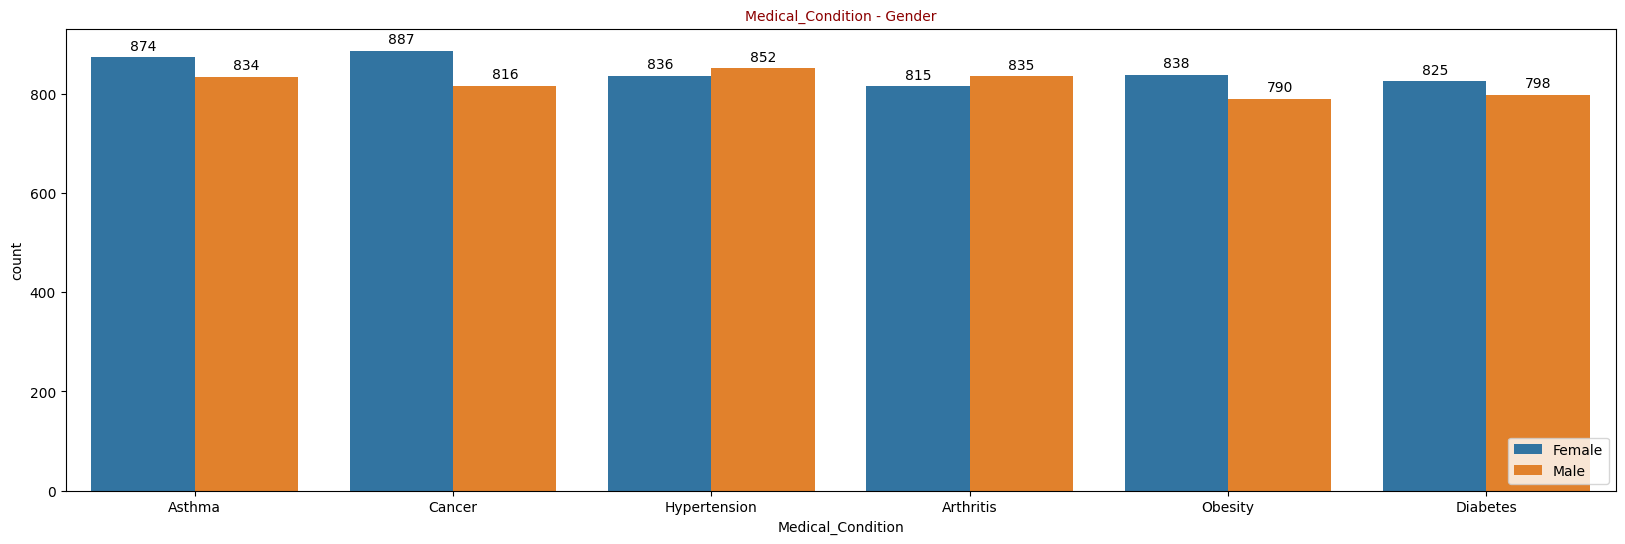

In [50]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Medical_Condition", hue=hcare['Gender'],ax = ax,order=hcare['Medical_Condition'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition - Gender", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

**Medical_Condition - Insurance_Provider**

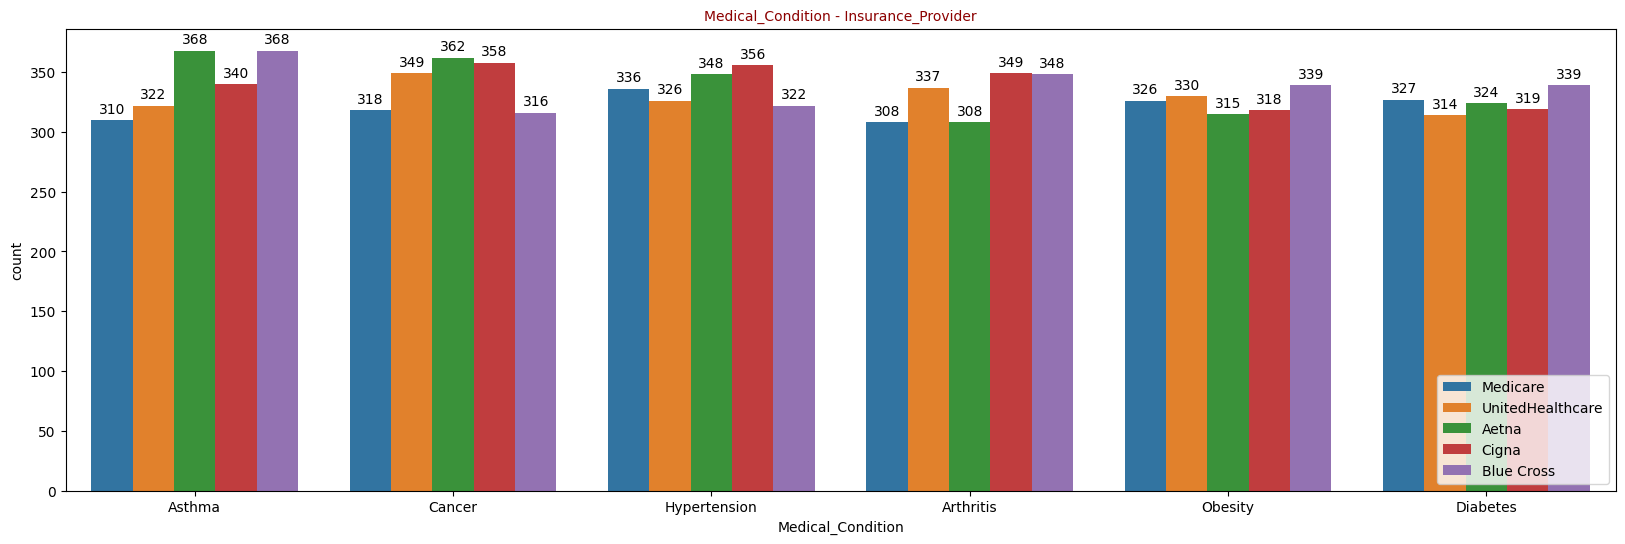

In [51]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Medical_Condition", hue=hcare['Insurance_Provider'],ax = ax,order=hcare['Medical_Condition'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition - Insurance_Provider", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

**Medical Condition - Medication**

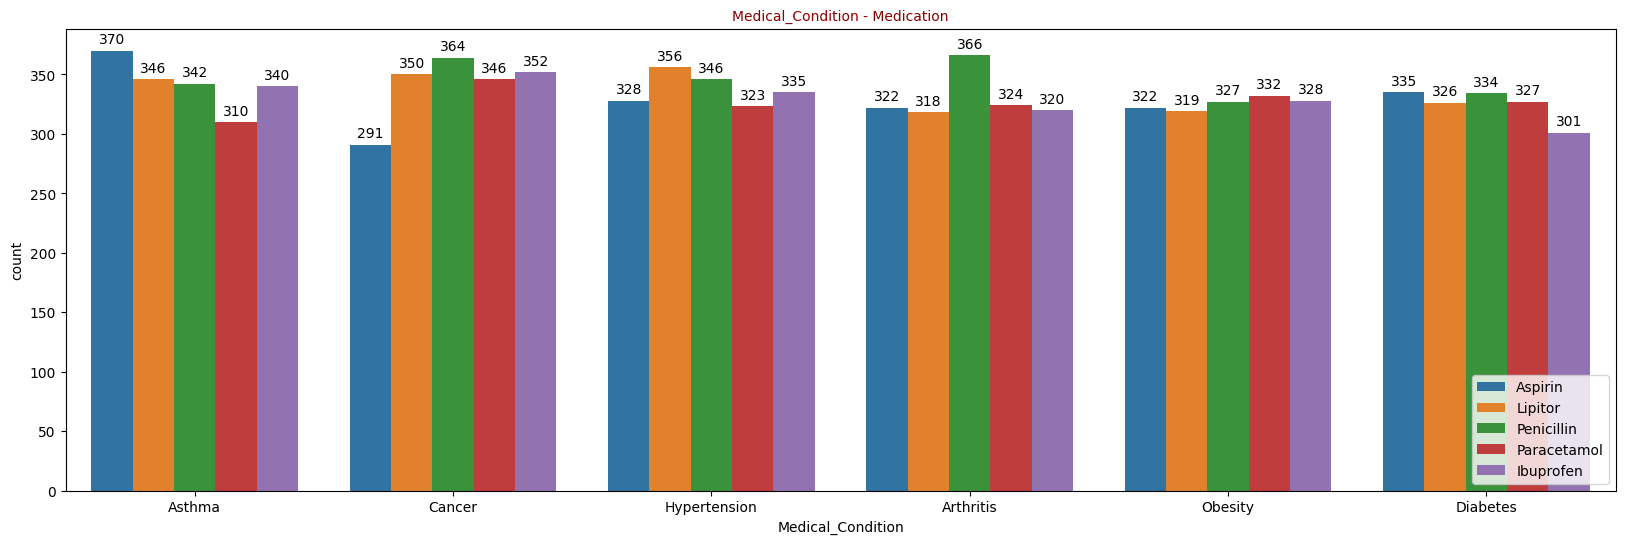

In [52]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Medical_Condition", hue=hcare['Medication'],ax = ax,order=hcare['Medical_Condition'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Medical_Condition - Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In Arthritis most repeated medication is Penicillin
- 
In Asthma most repeated medication is Aspirin

**Gender - Insurance_Provider**

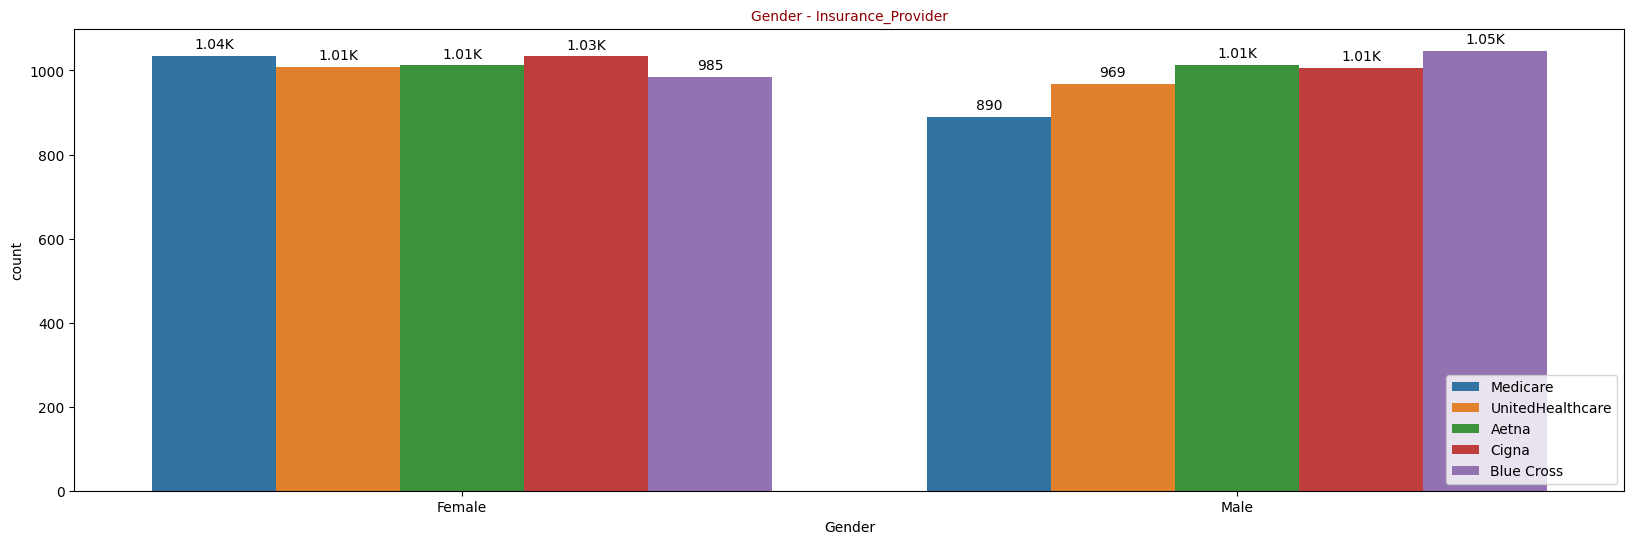

In [53]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Gender", hue=hcare['Insurance_Provider'],ax = ax,order=hcare['Gender'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Gender - Insurance_Provider", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In female segment best facility is provided by Medicare and in Male segments it is totally different, in male Blue Cross is most famous


**Gender - Medication**

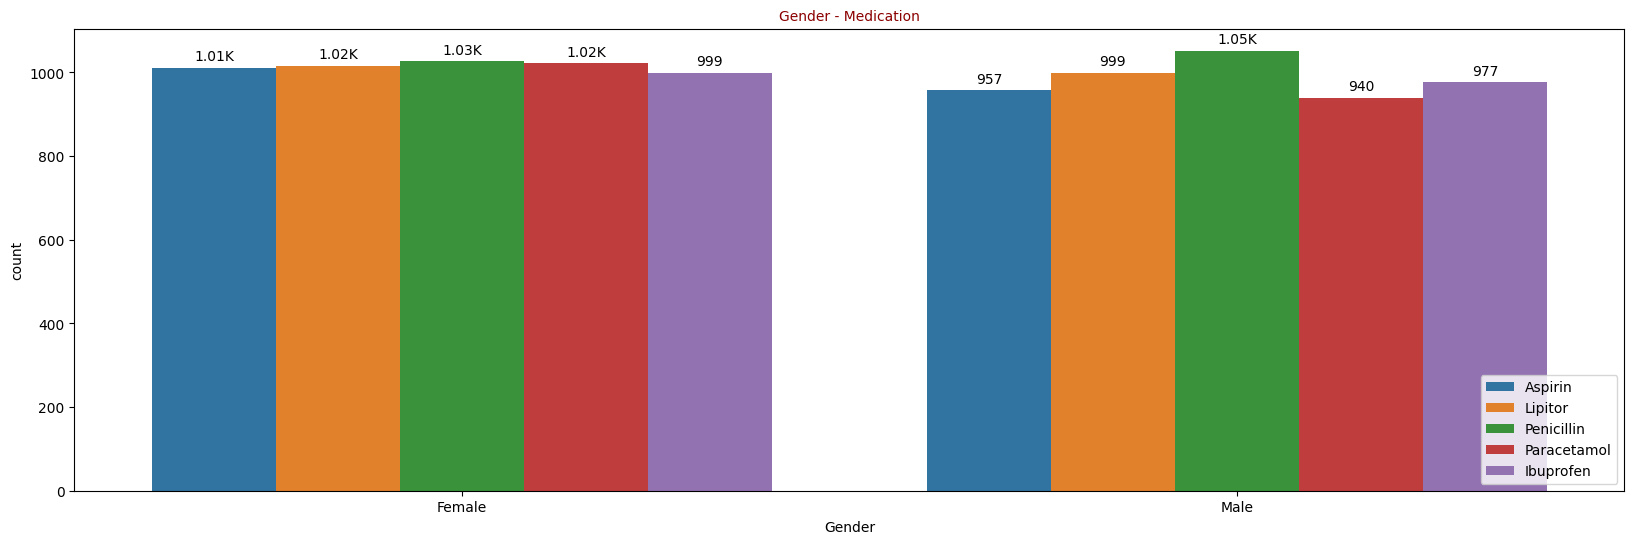

In [54]:
fig,ax = plt.subplots(figsize = (20,6))
sns.countplot(hcare, x = "Gender", hue=hcare['Medication'],ax = ax,order=hcare['Gender'].value_counts().index)
plt.legend(loc='lower right')
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Gender - Medication", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

- In this graph we can see that male are having highest medication of Penicillin maybe most of male will be having Arthritis

 **Days_Hospitalized - Medical_Conditions**

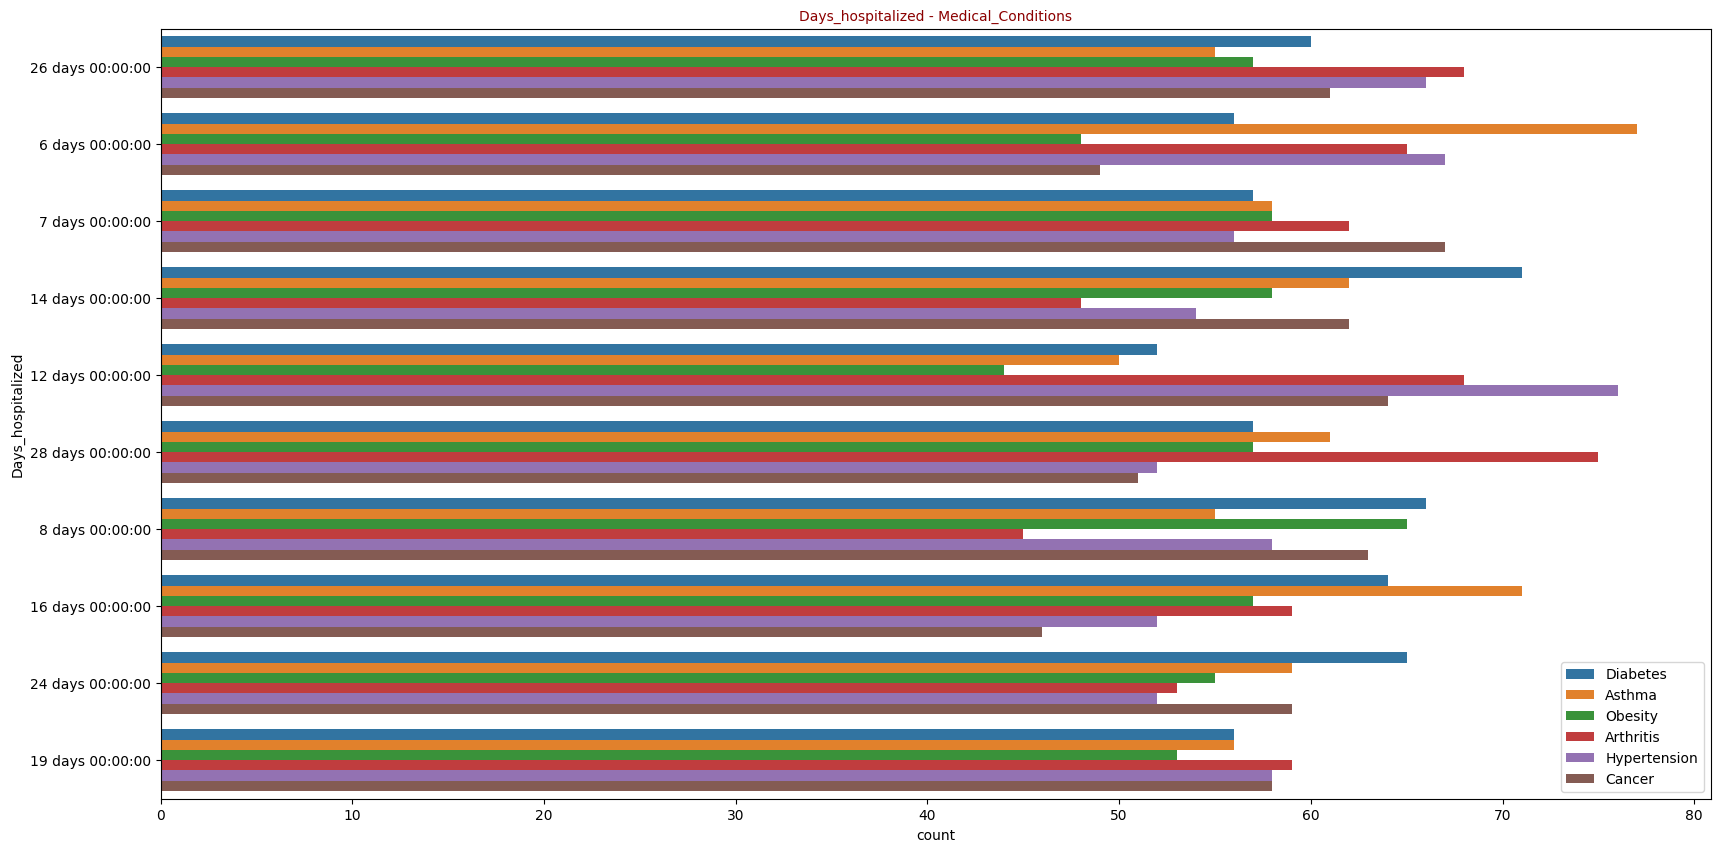

In [55]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(hcare, y = "Days_hospitalized", hue = hcare['Medical_Condition'],ax = ax, order = hcare['Days_hospitalized'].value_counts().iloc[:10].index)
plt.legend(loc='lower right')
ax.set_title("Days_hospitalized - Medical_Conditions", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

## **Model Building**

In [56]:
# Extract the numerical part from the 'Days_hospitalized' column
# converting TimeDelta64DType to Float64DType
hcare['Days_hospitalized'] = hcare['Days_hospitalized'].dt.days.astype(float)

In [57]:
# spilitting dataset into X, y
    
X = hcare.drop(columns = ['Name','Date_of_Admission','Billing_Amount','Room_Number','Discharge_Date','Test_Results'],axis = 1)
y = hcare['Test_Results']

In [58]:
# label encoding on y label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [59]:
# Import and perform categorical encoder on X label
import category_encoders as ce
X = ce.TargetEncoder(smoothing = 0).fit_transform(X, y)

In [60]:
#Train - Test - Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [61]:
#Standarscaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Random Forest classifier**

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred = rf.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score

In [65]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy score: %.2f%%" % (accuracy * 100.0))

Accuracy score: 32.50%


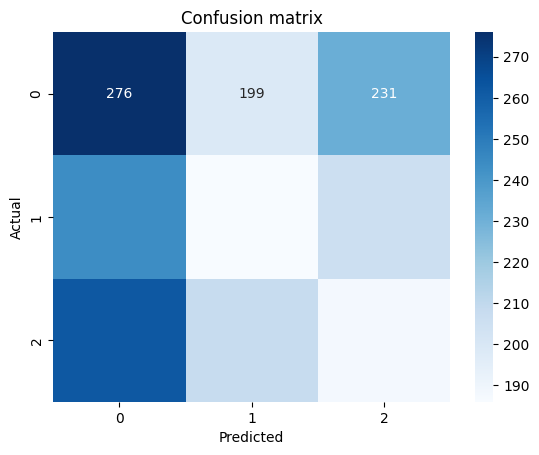

In [66]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion matrix')
plt.show()

In [67]:
from sklearn.metrics import classification_report

In [68]:
class_rep = classification_report(y_pred,y_test)
print(f'Classification Report:\n{class_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       782
           1       0.29      0.31      0.30       593
           2       0.29      0.30      0.29       625

    accuracy                           0.33      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.33      0.33      0.33      2000

